# Main research question
### What factors have the most significant impact on insurance expenses for individuals in the United States and how can these insights benefit insurance companies?

- Dependent variable: Insurance expenses
- Independent variables: Age, BMI, sex, smoking, children & region

# Age Analysis

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [ ]:
os.chdir ("C:\\Users\\saharlamuhumedhussei")
os.getcwd

<function nt.getcwd()>

In [42]:
insurance = pd.read_csv(r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv")


### Dataframe


In [43]:
import pandas as pd

# Path to the csv file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into the DataFrame
insurance = pd.read_csv(file_path)

# Display the data
print(insurance)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


### Mean of age groups
- to get a better understanding about the mean age in the dataset

In [44]:
# Define age groups 
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

# Calculate the mean insurance expenses for each age group
for age_group, (min_age, max_age) in age_groups.items():
    mean_expenses = insurance[(insurance['age'] >= min_age) & (insurance['age'] <= max_age)]['expenses'].mean()
    print(f"Mean Expenses for {age_group}: {mean_expenses:.2f}")


Mean Expenses for 18-30: 9397.55
Mean Expenses for 31-40: 11639.31
Mean Expenses for 41-50: 14782.04
Mean Expenses for 51-60: 17062.29
Mean Expenses for 61 and above: 21063.16


### Visualize the mean insurance expenses by age group
- to get a better understanding about the mean age in the dataset

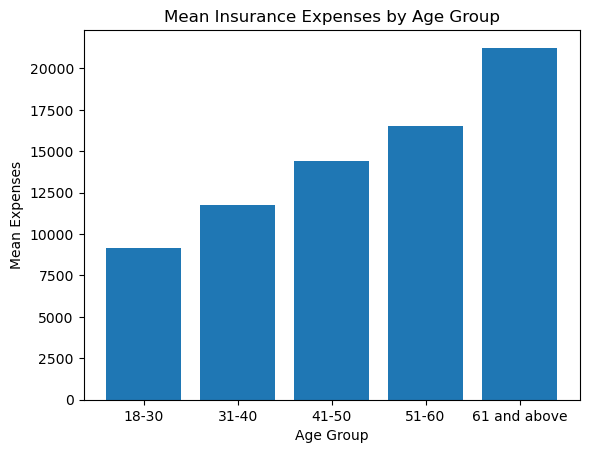

In [45]:
import matplotlib.pyplot as plt

# Define the age group bins and labels
age_bins = [18, 30, 40, 50, 60, float('inf')]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61 and above']

# Create an 'AgeGroup' column based on the age bins and labels
insurance['AgeGroup'] = pd.cut(insurance['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the mean insurance expenses for each age group
mean_expenses_by_age_group = insurance.groupby('AgeGroup')['expenses'].mean()

# Create a bar plot
plt.bar(mean_expenses_by_age_group.index, mean_expenses_by_age_group)
plt.xlabel('Age Group')
plt.ylabel('Mean Expenses')
plt.title('Mean Insurance Expenses by Age Group')
plt.show()


## SQ 1:    - Is there a connection between age and insurance expenses?

 
- H0: Age does not have an effect on insurance expenses 
- Ha: Age does have an effect on insurance expenses

### 1.0 Anova
Performing an Analysis of Variance (ANOVA) for age groups can assist to understand whether there are statistically significant differences in the mean insurance expenses among different age groups.


In [46]:
# Define age groups
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['expenses']
    grouped_data.append(group_data)

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

alpha = 0.05  # Set the significance level

# Print the results in an ANOVA-specific format
print("One-way ANOVA Test")
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.")
else:
    print("Result: Fail to reject the null hypothesis (H0): Age does not have an effect on insurance expenses.")


One-way ANOVA Test
F-statistic: 32.29
p-value: 0.0000
Result: There is significant evidence to reject the null hypothesis (Ha): Age does have an effect on insurance expenses.


This result indicates that there is a significant difference in insurance expenses across different age groups. The low p-value (0.0000) indicates strong evidence against the null hypothesis, which states that age does not have an effect on insurance expenses. The F-statistic (32.29) also supports this, as it measures the ratio of the variance between groups to the variance within groups. Higher values of the F-statistic suggest a greater difference between group means.

### 1.1 Assumptions for Anova

Generally while performing ANOVA testing for the assumptions is a must

The assumptions for one-way ANOVA are:
1. *Sample independence*: each sample has been drawn independently of the other samples
2. *Normality*: each sample is taken from a normally distributed population 
3.  *Equal variance*: the variance of data within the different groups should be the same


#### 2. Testing for normality
- *Compute the residuals*: the residuals are computes by simply subtracting from the measurements of each segment the mean value for that segment and dividing by the standard deviation of each segment.

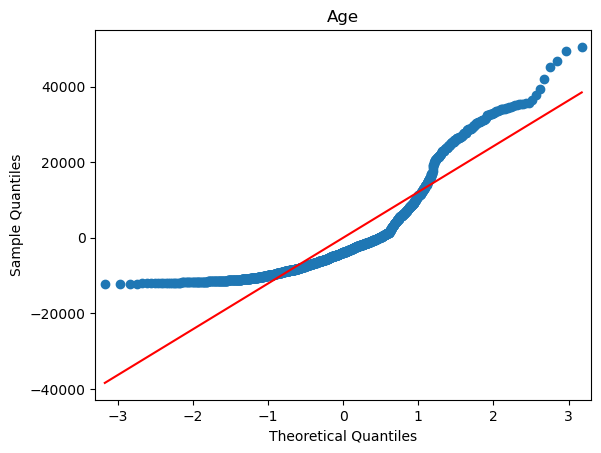

In [47]:

# Fit a linear model
income_segment_lm = sm.OLS(np.concatenate(grouped_data), sm.add_constant(np.concatenate([data.index.values for data in grouped_data]))).fit()

# Get the residuals
residuals = income_segment_lm.resid

# Create a QQ plot
sm.qqplot(residuals, line='s')

# Add labels and title
plt.title('Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


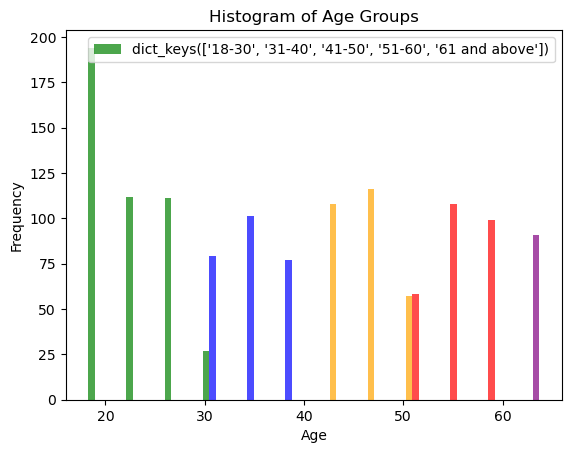

In [50]:
import matplotlib.pyplot as plt
import numpy as np

#'insurance' in the has a DataFrame with 'age' and 'expenses' columns
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['age']
    grouped_data.append(group_data)

# Create a histogram for 'age' with different colors for each group
colors = ['green', 'blue', 'orange', 'red', 'purple']
plt.hist(grouped_data, bins='auto', color=colors, alpha=0.7, rwidth=0.85, label=age_groups.keys())

# Add labels and title
plt.title('Histogram of Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a legend for age groups
plt.legend()

# Show the plot
plt.show()


- based on the QQ and Histogram it means that the data is not normally distrubted and that means that we have to use the levene's test for variance

#### Equal variance: Visually analyzing the data first for testing equal variance

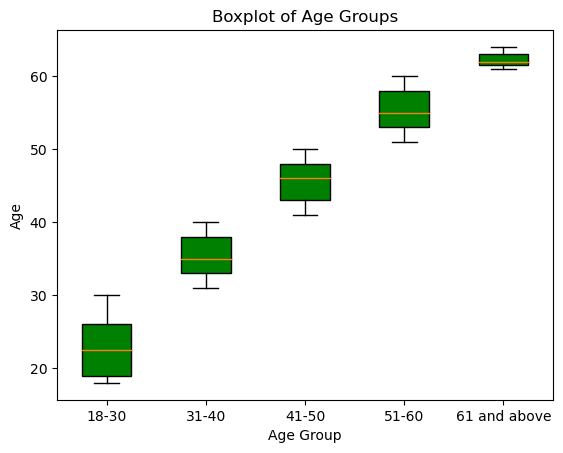

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

#'insurance' in the has a DataFrame with 'age' and 'expenses' columns
age_groups = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))
}

grouped_data = []

for group, age_range in age_groups.items():
    group_data = insurance[(insurance['age'] >= age_range[0]) & (insurance['age'] <= age_range[1])]['age']
    grouped_data.append(group_data)

# Create a boxplot for 'age' with a single color for all boxes
plt.boxplot(grouped_data, labels=age_groups.keys(), patch_artist=True, boxprops=dict(facecolor='green'))

# Add labels and title
plt.title('Boxplot of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Age')

# Show the plot
plt.show()

- The boxplot helps to visually analyzing the data first for testing equal variance

#### 1.3 Testing for Equal Variance
- Levene Test
- To check whether the variances of different groups are significantly different and It does this by comparing the variances between groups with the variances within the age groups.

Levene's Test - p-value: 0.0000


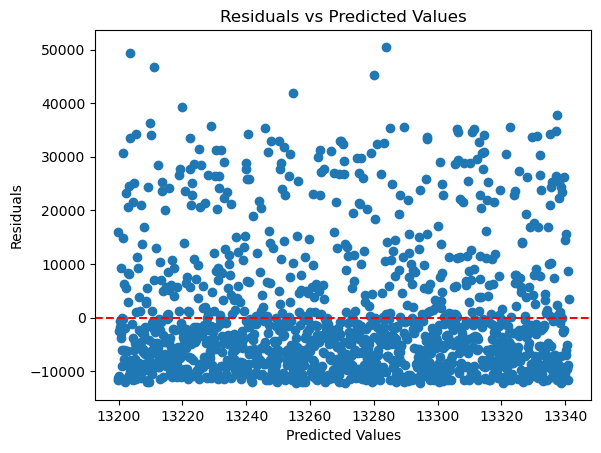

In [55]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# 2. Homogeneity of Variances assumption
# Using Levene's test
statistic, p_value_levene = stats.levene(*grouped_data)
print(f'Levene\'s Test - p-value: {p_value_levene:.4f}')

# Plot residuals against predicted values for visual inspection
plt.scatter(income_segment_lm.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Conclusion
- The results indicates that there is significant evidence to reject the null hypothesis, suggesting that age does have an effect on insurance expenses.  In the one-way Anova test, the small p-value indicates that there is a significant difference in the mean expenses among the age groups. With the Levene test it indicated that the p-value is very small (p-value: 0.0000) and that there is a significant difference in variances across the age groups.

- In conclusion, the ANOVA results, combined with the Levene's Test results, support the conclusion that age plays a significant role in determining insurance expenses, and the effect is not consistent across all age groups.

# BMI Analysis

In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
#in order to calculate pearson and spearman, import pearsonr and import spearmanr from scripy.stats
#generate 100 x-y value pairs from a standard normal distribution. Plot the x-y pairs and compute the covariance matrix

This is where the Insurance file analysis begins

In [ ]:
from scipy.stats import pearsonr
#importing pearson correlation function

In [ ]:
df = pd.read_csv(r'C:\Users\Kristian\Downloads\Insurance.csv')
#importing the data file

In [ ]:
df.head()
#showing the head of the dataframe, just to see if it works

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
male_data = df[df['sex'] =='male']
#separating data based on sex = male

In [ ]:
print(male_data)

      age   sex   bmi  children smoker     region  expenses
1      18  male  33.8         1     no  southeast   1725.55
2      28  male  33.0         3     no  southeast   4449.46
3      33  male  22.7         0     no  northwest  21984.47
4      32  male  28.9         0     no  northwest   3866.86
8      37  male  29.8         2     no  northeast   6406.41
...   ...   ...   ...       ...    ...        ...       ...
1324   31  male  25.9         1     no  northwest   4239.89
1325   61  male  33.5         0     no  northeast  13143.34
1327   51  male  30.0         1     no  southeast   9377.90
1329   52  male  38.6         2     no  southwest  10325.21
1333   50  male  31.0         3     no  northwest  10600.55

[676 rows x 7 columns]


In [ ]:
male_expenses_mean = male_data['expenses'].mean()
#calculating the mean expenses for the male population in the sample

In [ ]:
male_expenses_mean
print("The mean expense for a typical male inside this sample is equal to",male_expenses_mean,".")
#this way we get the mean of male expenses.

The mean expense for a typical male inside this sample is equal to 13956.751420118342 .


In [ ]:
average_male_bmi = male_data['bmi'].mean()
print(average_male_bmi)

30.94526627218935


In [ ]:
female_expenses = df[df['sex']=='female']
print(female_expenses)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
5      31  female  25.7         0     no  southeast   3756.62
6      46  female  33.4         1     no  southeast   8240.59
7      37  female  27.7         3     no  northwest   7281.51
9      60  female  25.8         0     no  northwest  28923.14
...   ...     ...   ...       ...    ...        ...       ...
1332   52  female  44.7         3     no  southwest  11411.69
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[662 rows x 7 columns]


In [ ]:
female_expenses_mean = female_expenses['expenses'].mean()

In [ ]:
print("The mean expenses for an average female in this sample are equal to",female_expenses_mean)

The mean expenses for an average female in this sample are equal to 12569.578897280968


In [ ]:
smokers_mean = df[df['smoker']=='yes']
print(smokers_mean)
                    

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
11     62  female  26.3         0    yes  southeast  27808.73
14     27    male  42.1         0    yes  southeast  39611.76
19     30    male  35.3         0    yes  southwest  36837.47
23     34  female  31.9         1    yes  northeast  37701.88
...   ...     ...   ...       ...    ...        ...       ...
1313   19  female  34.7         2    yes  southwest  36397.58
1314   30  female  23.7         3    yes  northwest  18765.88
1321   62    male  26.7         0    yes  northeast  28101.33
1323   42  female  40.4         2    yes  southeast  43896.38
1337   61  female  29.1         0    yes  northwest  29141.36

[274 rows x 7 columns]


In [ ]:
smokers_expenses_mean = smokers_mean['expenses'].mean()
print(smokers_expenses_mean)
print("The mean of expenses for smokers in the sample is equal to",smokers_expenses_mean)

32050.23197080292
The mean of expenses for smokers in the sample is equal to 32050.23197080292


In [ ]:
nonsmokers_mean = df[df['smoker']=='no']
print(nonsmokers_mean)

      age     sex   bmi  children smoker     region  expenses
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
5      31  female  25.7         0     no  southeast   3756.62
...   ...     ...   ...       ...    ...        ...       ...
1332   52  female  44.7         3     no  southwest  11411.69
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95

[1064 rows x 7 columns]


In [ ]:
nonsmokers_expenses_mean = nonsmokers_mean['expenses'].mean()
print(nonsmokers_expenses_mean)
print("The mean of expenses for non-smokers in the sample is equal to",nonsmokers_expenses_mean)

8434.268449248118
The mean of expenses for non-smokers in the sample is equal to 8434.268449248118


### Making a Histogram for BMI groups and their average expenses

--> this is to visualize how the expenses move between different BMI groups

In [ ]:
BMI = df.bmi.to_list() #moving column "BMI" from the dataframe to a list, to be able to create visualizations
Expenses = df.expenses.to_list() #moving column "Expenses" from the dataframe to a list, to be able to create visualizations

In [ ]:
print(BMI)
print(Expenses)
#BMI ranges = <18.5 --> Underweight; 18.5-24.9 --> Healthy; 25.0 - 29.9 --> Overweight; 30.0 + --> Obese

[27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2, 26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3, 36.0, 32.4, 34.1, 31.9, 28.0, 27.7, 23.1, 32.8, 17.4, 36.3, 35.6, 26.3, 28.6, 28.3, 36.4, 20.4, 33.0, 20.8, 36.7, 39.9, 26.6, 36.6, 21.8, 30.8, 37.1, 37.3, 38.7, 34.8, 24.5, 35.2, 35.6, 33.6, 28.0, 34.4, 28.7, 37.0, 31.8, 31.7, 22.9, 37.3, 27.4, 33.7, 24.7, 25.9, 22.4, 28.9, 39.1, 26.3, 36.2, 24.0, 24.8, 28.5, 28.1, 32.0, 27.4, 34.0, 29.6, 35.5, 39.8, 33.0, 26.9, 38.3, 37.6, 41.2, 34.8, 22.9, 31.2, 27.2, 27.7, 27.0, 39.5, 24.8, 29.8, 34.8, 31.3, 37.6, 30.8, 38.3, 20.0, 19.3, 31.6, 25.5, 30.1, 29.9, 27.5, 28.0, 28.4, 30.9, 27.9, 35.1, 33.6, 29.7, 30.8, 35.7, 32.2, 28.6, 49.1, 27.9, 27.2, 23.4, 37.1, 23.8, 29.0, 31.4, 33.9, 28.8, 28.3, 37.4, 17.8, 34.7, 26.5, 22.0, 35.9, 25.6, 28.8, 28.1, 34.1, 25.2, 31.9, 36.0, 22.4, 32.5, 25.3, 29.7, 28.7, 38.8, 30.5, 37.7, 37.4, 28.4, 24.1, 29.7, 37.1, 23.4, 25.5, 39.5, 24.4, 25.2, 35.5, 27.8, 26.6, 36.9, 39.6, 29.8, 29.6, 28.2, 37.

In [ ]:
BMI_groups = {
    '0-18.5': (0,18.5), #underweight range
    '18.51-25': (18.51,25), #normal weight range
    '25.01-29.99': (25.01,29.99), #overweight range 
    '30.0 - 34.99': (30,34.99), #obesity range
    '35.0 and above':(35, float('inf')) #severe obesity range
}

In [ ]:
#calculating mean insurance expenses for each BMI group

for BMI_group, (min_BMI, max_BMI) in BMI_groups.items(): 
    mean_expenses = df[(df['bmi']>=min_BMI) & (df['bmi']<=max_BMI)]['expenses'].mean()
    print(f"Mean Expenses for {BMI_group}: {mean_expenses:.2f}")


Mean Expenses for 0-18.5: 8657.62
Mean Expenses for 18.51-25: 10435.44
Mean Expenses for 25.01-29.99: 10989.85
Mean Expenses for 30.0 - 34.99: 14298.84
Mean Expenses for 35.0 and above: 17076.96


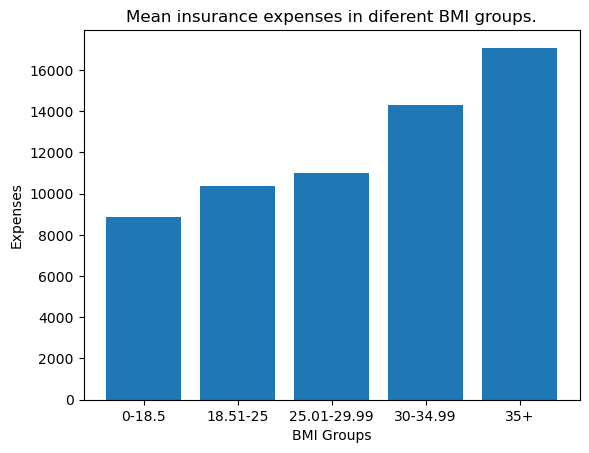

In [ ]:
#defining BMI bins for bar chart

BMI_bins = [0, 18.5, 25, 30, 35, 100] #bin for each
BMI_labels = ['0-18.5','18.51-25','25.01-29.99','30-34.99','35+']
#creating BMI group based on labels and BMI bins
df['BMIGroup'] = pd.cut(df['bmi'],bins=BMI_bins,labels = BMI_labels, right=False)
#calculating mean expenses by BMI group again
mean_expenses_by_age_group = df.groupby('BMIGroup')['expenses'].mean()
#creating a bar chart
plt.bar(mean_expenses_by_age_group.index, mean_expenses_by_age_group)
plt.xlabel("BMI Groups")
plt.ylabel("Expenses")
plt.title('Mean insurance expenses in diferent BMI groups.')
plt.show()

### Conducting a T-test

In [ ]:
t_stat, p_value = stats.ttest_ind(Expenses, BMI)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, BMI has an effect on insurance expenses")
else: 
    print("Null hypothesis not rejected.")
#this shows there is indeed a relationship

1.5385809471468848e-274
Reject the null hypothesis, BMI has an effect on insurance expenses


### Conducting a Correlation Coefficient

In [ ]:
correlation_coefficient = df['bmi'].corr(df['expenses'])
#calculating correlation between bmi and expense

In [ ]:
print("Pearson's correlation coefficient between bmi and expenses: ",correlation_coefficient)
#correlation between bmi and expenses. This however shows that the relationship is weak.

Pearson's correlation coefficient between bmi and expenses:  0.198576255018932


### Plotting the data in a box plot

Text(0, 0.5, 'Expenses')

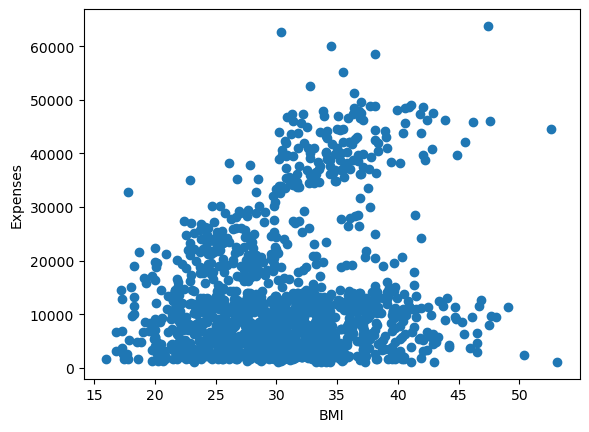

In [ ]:
plt.scatter(BMI, Expenses)
plt.xlabel("BMI")
plt.ylabel("Expenses")

In [ ]:
average_bmi = np.mean(BMI)
average_expenses = np.mean(Expenses)
print("Average BMI for a person within this data set is equal to: ",average_bmi)
print("Average Expenses for a person within this data set is equal to: ",average_expenses)

Average BMI for a person within this data set is equal to:  30.66547085201794
Average Expenses for a person within this data set is equal to:  13270.422414050823


### Kruskal Wallis H test

for ordinal variables. One can argue BMI is ordinal as well as it can be order from best to worst.

In [ ]:
for group, BMI_range in BMI_groups.items():
    group_data = df[(df['bmi']>=BMI_range[0])&(df['bmi']<=BMI_range[1])]['expenses']
    grouped_data.append(group_data)

In [ ]:
alpha = 0.05
test_stat, p_val = stats.kruskal(BMI,Expenses)
print('The p-value for Kruskal-Wallis H test is:', p_val)
print("Reject the null hypothesis, value is less than alpha. Population means of the different groups are not equal, therefore BMI has an effect on insurance expenses.")

The p-value for Kruskal-Wallis H test is: 0.0
Reject the null hypothesis, value is less than alpha. Population means of the different groups are not equal, therefore BMI has an effect on insurance expenses.


### ANOVA Test

to compare means of independent groups. Independent groups in this case are the different BMI groups.

In [ ]:
#Performing ANOVA

f_statistic, p_value = stats.f_oneway(*grouped_data)
alpha = 0.05

#data is normally distributed, data is independent (BMI groups VS expenses), (three or more categorical data = different levels of BMI, 4 different categories) 

In [ ]:
#Printing results from the above ANOVA test

print("One-way ANOVA Test")
print(f'F-statistic:{f_statistic:.2f}')
print(f'p-value:{p_value:.4f}')

if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis Ha = BMI has an effect on insurance expenses.")
else: 
    print("Failing to reject the null hypothesis, BMI doest not have an effect on insurance expenses.")

One-way ANOVA Test
F-statistic:16.58
p-value:0.0000
There is significant evidence to reject the null hypothesis Ha = BMI has an effect on insurance expenses.


# Sex analysis

In [ ]:
# Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
# Reading the CSV file into a DataFrame, also placing the right file path
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')

# Display the first few rows from the DataFrame
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


#### Data exploration
##### Checking balance in observations for the samples to ensure the validity for the statistical testsing.

In [ ]:
# Count the occurrences of 'male' and 'female' in the 'sex' column
sex_counts = df['sex'].value_counts()

# Display the counts
print(sex_counts)

sex
male      676
female    662
Name: count, dtype: int64


##### Comparing means to check whether the average values differ significantly between the groups. 
- A significant difference in means could suggest a difference in central tendency.

In [ ]:
# Group the data by 'sex' and calculate the mean 'expenses' for each group
grouped = df.groupby('sex')['expenses'].mean()

# Calculate the mean difference
mean_difference = grouped['male'] - grouped['female']

# Print the results
print("Mean expenses for males:", grouped['male'])
print("Mean expenses for females:", grouped['female'])
print("Mean difference between males and females:", mean_difference)

Mean expenses for males: 13956.751420118344
Mean expenses for females: 12569.578897280968
Mean difference between males and females: 1387.1725228373762


##### Visualization using a histogram.

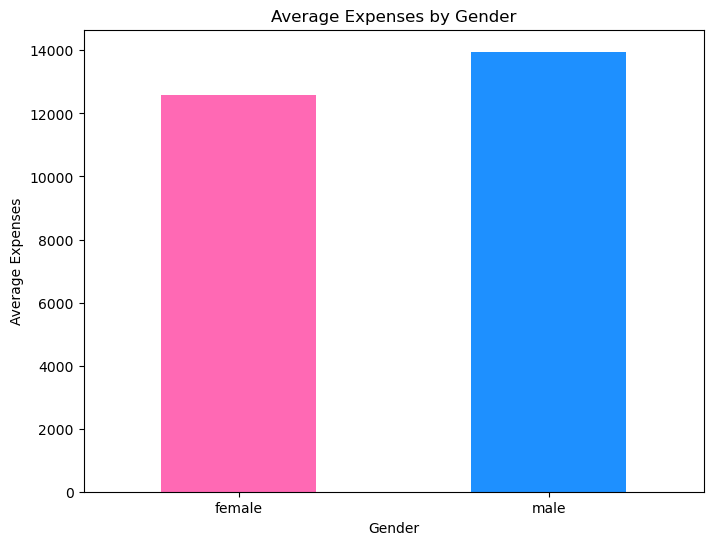

In [ ]:
# Define colors for 'male' and 'female' bars
colors = ['hotpink', 'dodgerblue']

# Create a bar chart to display the mean expenses
grouped.plot(kind='bar', figsize=(8, 6), color=colors)
plt.xlabel('Gender')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Gender')
plt.xticks(rotation=0)
plt.show()

##### Comparing medians to assess whether the typical value in one group differs from the typical value in the other group. 
- This is particularly useful when dealing with skewed or non-normally distributed data.

In [ ]:
# Calculate the median expenses for 'male' and 'female' groups
male_median = df[df['sex'] == 'male']['expenses'].median()
female_median = df[df['sex'] == 'female']['expenses'].median()

# Print the medians
print("Median expenses for males:", male_median)
print("Median expenses for females:", female_median)

Median expenses for males: 9369.615
Median expenses for females: 9412.965


##### Gaining insights into the distribution of expenses by gender.

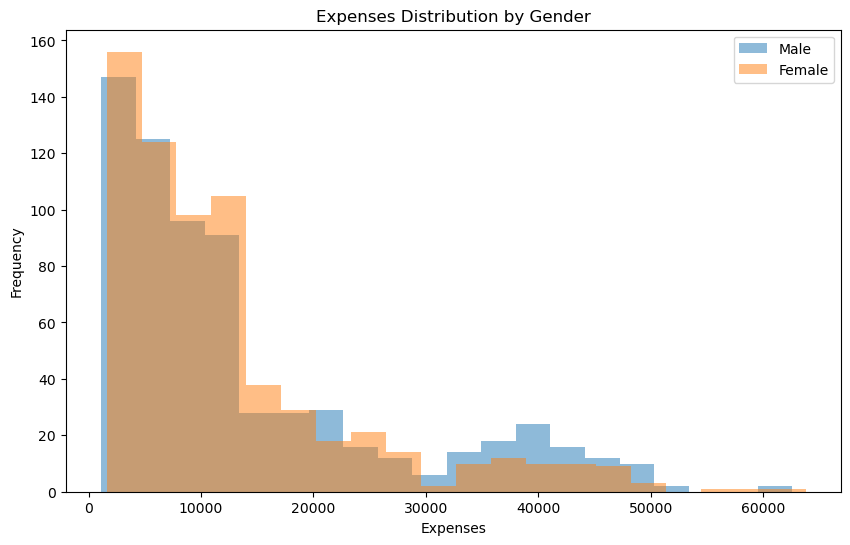

In [ ]:
# Group the data by 'sex' and get the 'expenses' column
male_expenses = df[df['sex'] == 'male']['expenses']
female_expenses = df[df['sex'] == 'female']['expenses']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(male_expenses, bins=20, alpha=0.5, label='Male')
plt.hist(female_expenses, bins=20, alpha=0.5, label='Female')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Expenses Distribution by Gender')
plt.legend(loc='upper right')
plt.show()

##### Using a heatmap to explore how insurance expenses are distributed by sex and region.
- Also to gain a better understanding of the relationships within the dataset.

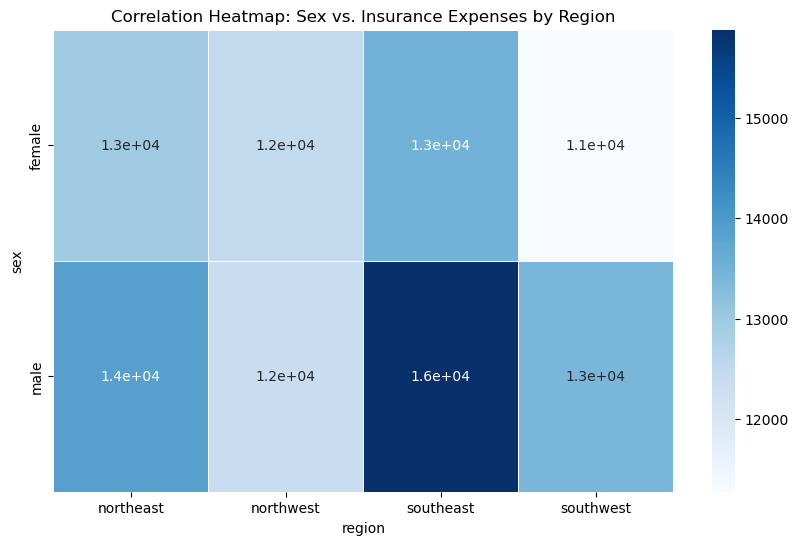

In [ ]:
# Create a pivot table to reshape the data for the heatmap
pivot_data = df.pivot_table(index='sex', columns='region', values='expenses')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap: Sex vs. Insurance Expenses by Region')
plt.show()

## Sub-question 3: Does sex relate to differences in insurance expenses?
- H0: The difference in gender does not affect insurance expenses (μ1 = μ2).
- Ha: The difference in gender affects the insurance costs (μ1 ≠ μ2).

### Indepent Samples T-Test

In [ ]:
# Assumptions for Independent Samples T-Test

# 1. Independence Assumption:
# The observations in the 'male' and 'female' groups are independent of each other.

# 2. Random Sample Assumption:
# The data is collected through a random sampling method to ensure that it represents the larger population from which it is drawn.


In [ ]:
# 3. Normality Assumption:
# Check the normality of data distribution for both 'male' and 'female' groups.

# Shapiro-Wilk test for normality
shapiro_statistic_male, shapiro_p_male = stats.shapiro(male_data)
shapiro_statistic_female, shapiro_p_female = stats.shapiro(female_data)

print(f"Shapiro-Wilk test for 'male' group: Statistic={shapiro_statistic_male}, p-value={shapiro_p_male}")
print(f"Shapiro-Wilk test for 'female' group: Statistic={shapiro_statistic_female}, p-value={shapiro_p_female}")

Shapiro-Wilk test for 'male' group: Statistic=0.8228137493133545, p-value=1.1787909988118692e-26
Shapiro-Wilk test for 'female' group: Statistic=0.8053944110870361, p-value=1.8305655972609575e-27


- The closer the Shapiro-Wilk test statistic is to 1, the more the data resembles a normal distribution. In both cases, the test statistics are less than 1, which suggests that the data in both groups deviates from a perfect normal distribution.

- The p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the data in each group follows a normal distribution. 
- For both the 'male' and 'female' group, the extremely low p-value (close to zero) indicates strong evidence against the assumption that the data follows a normal distribution.

In [ ]:
# 4. Homogeneity of Variance : 
# The variances of the two groups being compared should be approximately equal.

# Levene's test for homogeneity of variances
levene_statistic, levene_p = stats.levene(male_data, female_data)

print(f"Levene's test: Statistic={levene_statistic}, p-value={levene_p}")

# Check the p-value to assess homogeneity of variances

Levene's test: Statistic=9.90925249902728, p-value=0.0016808754266950151


- The Levene's test statistic (9.91) represents the result of the test. A larger test statistic indicates a greater difference in variances among the groups.
- The p-value is very low (0.00168), indicating that there is strong evidence that the variances between groups in these data are not equal, meaning that the assumption of homogeneity of variances has been violated.

In [ ]:
# Perform the Independent Samples t-test
t_stat, p_value = stats.ttest_ind(male_data, female_data)

# Output the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.0975468761820912
P-Value: 0.03613269566075222


In [ ]:
# Determine whether the difference is statistically significant
alpha = 0.05  # The significance level
if p_value < alpha:
    print("The difference between 'male' and 'female' groups is statistically significant.")
else:
    print("There is no statistically significant difference between 'male' and 'female' groups.")

The difference between 'male' and 'female' groups is statistically significant.


- This t-statistic (2.0975) implies that there is some evidence that the sample mean is higher than the population mean.
- Since the p-value is less than 0.05, it is typically considered statistically significant.

- There is a statistically significant difference in insurance expenditures between male and female. The results suggests that gender is associated with a difference in insurance costs, supporting the alternative hypothesis (Ha).

### Welch's T-Test
- Since the variances of 'male' and 'female' is not equal, an alternative to compare means is the Welch's T-Test. 
- Also known als the 'unequal variances t-test' and is appropriate when the variances of the two groups are not equal.


In [ ]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)

# Print the results
print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

# Make a significance decision based on the p-value
alpha = 0.05  # The significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Welch's t-statistic: 2.100888109762454
P-value: 0.035840989751783965
Reject the null hypothesis


#### Based on the p-value we can conclude that there is a statistically significant difference in insurance expenses between males and females based on the data and the chosen significance level. This supports the alternative hypothesis (Ha) and suggests that gender has a significant effect on insurance costs.

# Smoker Analysis

In [ ]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load the dataset and create a DataFrame
df = pd.read_csv('insurance.csv')

# Display the data
print(df)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [ ]:
 # Check what is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# Display the cleaned DataFrame
print(df)

# Display the summary of missing values (if any)
print("Summary of Missing Values:")
print(missing_values)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
Summary of Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [ ]:
# get a better understanding of the data
rp.codebook(df)

Variable: age    Data Type: int64 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 47 

 Range: [18, 64] 
 Mean: 39.21 
 Standard Deviation: 14.05 
 Mode: 18 
 10th Percentile: 19.0 
 25th Percentile: 27.0 
 50th Percentile: 39.0 
 75th Percentile: 51.0 
 90th Percentile: 59.0 





Variable: sex    Data Type: object 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
female        662
  male        676




Variable: bmi    Data Type: float64 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 275 

 Range: [16.0, 53.1] 
 Mean: 30.67 
 Standard Deviation: 6.1 
 Mode: 27.6 
 10th Percentile: 23.0 
 25th Percentile: 26.3 
 50th Percentile: 30.4 
 75th Percentile: 34.7 
 90th Percentile: 38.629999999999995 





Variable: children    Data Type: int64 

 Number of Obs.: 1338 
 Number of mi

## SQ4: Is there a relationship between smoking status and insurance expenses?
Hypothesis:


H0: Smoking status does not have an effect on insurance expenses (μ1 = μ2)


HA: Smoking status has an effect on insurance expenses (μ1 ≠ μ2)

In [ ]:

# Check how many values there are in the smoker column
smoker_counts = df['smoker'].value_counts()

print (smoker_counts)
print ('The samples are imbalanced')

no     1064
yes     274
Name: smoker, dtype: int64
The samples are imbalanced


In [ ]:
# Calculate the mean and the median
mean_expenses_by_smoker = df.groupby('smoker')['expenses'].mean()
median_expenses_by_smoker = df.groupby('smoker')['expenses'].median()

# Display the mean and median expenses for 'yes' and 'no' categories
print("Mean Expenses:")
print(mean_expenses_by_smoker)

print("\nMedian Expenses:") # "\n" = Line break 
print(median_expenses_by_smoker)

Mean Expenses:
smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

Median Expenses:
smoker
no      7345.405
yes    34456.350
Name: expenses, dtype: float64


In [ ]:
## Two-sample t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on my hypotheses
if p_value < alpha:
    print("Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("Fail to reject the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")
else:
    print("Fail to reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is no evidence to support the alternative hypothesis (HA).")

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).
Fail to reject the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).
T-Statistic: 46.6649210792002
P-Value: 8.271449574495316e-283


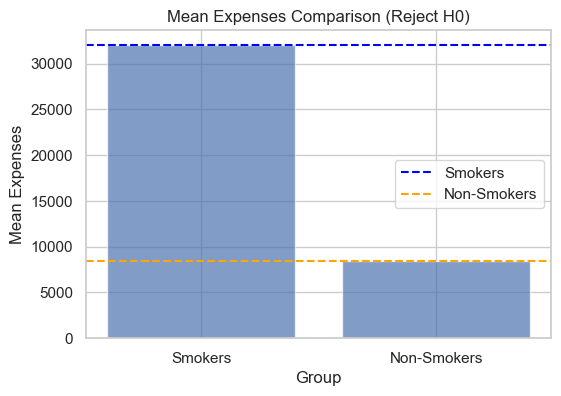

T-Statistic: 46.6649210792002
P-Value: 8.271449574495316e-283


In [ ]:
## Visualization of Two-sample t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on my hypotheses
if p_value < alpha:
    result = "Reject"
else:
    result = "Fail to reject"

# Create a bar chart to visualize the results
plt.figure(figsize=(6, 4))
plt.bar(['Smokers', 'Non-Smokers'], [expenses_smokers.mean(), expenses_non_smokers.mean()], alpha=0.7)
plt.xlabel('Group')
plt.ylabel('Mean Expenses')
plt.title(f'Mean Expenses Comparison ({result} H0)')
plt.axhline(y=expenses_smokers.mean(), color='blue', linestyle='--', label='Smokers')
plt.axhline(y=expenses_non_smokers.mean(), color='orange', linestyle='--', label='Non-Smokers')
plt.legend()
plt.show()

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

Eventhough the results of the two sample t-test suggest to Reject the null hypothesis (H0), and Fail to reject the alternative hypothesis (HA). However, it is evident that the sample is imbalanced, and two-sample t-test is less robust with imbalanced samples . Therefore it is suggest to perform the Welch's t-test, as it is more reliable with imbalanced sample sizes.

In [ ]:
## Welch's t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform the Welch's T-Test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers, equal_var=False)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on the Welch's T-Test
if p_value < alpha:
    print("Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is strong evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")
else:
    print("Fail to reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is no evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).
There is strong evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).
T-Statistic: 32.751887340417625
P-Value: 5.889487102677626e-103


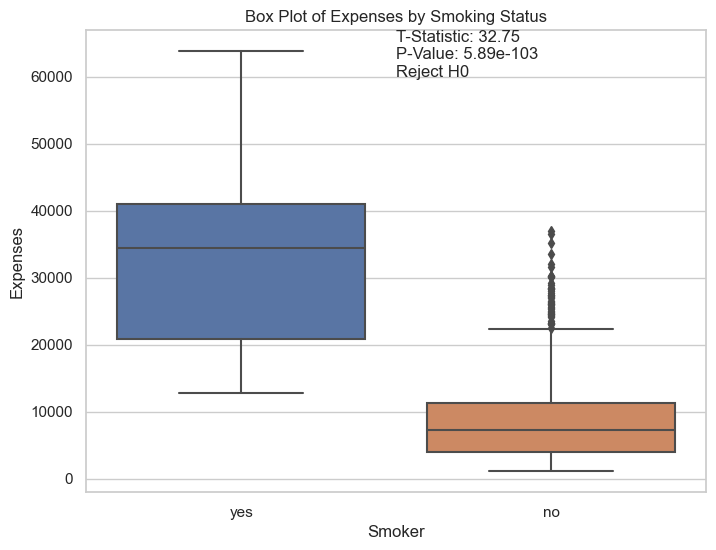

In [ ]:
## Visualization of Welch's t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform the Welch's T-Test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers, equal_var=False)

# Create a box plot to visualize the data
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title("Box Plot of Expenses by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Expenses")

# Print the t-statistic and p-value
if p_value < 0.05:
    plt.text(0.5, 0.9, f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}\nReject H0', transform=plt.gca().transAxes, fontsize=12)
else:
    plt.text(0.5, 0.9, f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}\nFail to Reject H0', transform=plt.gca().transAxes, fontsize=12)

plt.show()


Two sample t-test P-Value: 8.271, whereas, Welch's t-test P-Value: 5.889


Eventhough the p-value dropped down, the conclusion did not change, as the p-value is very close to zero:
Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).
There is strong evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).

# Children analysis

In [ ]:
# Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
# Reading the CSV file into a DataFrame, also placing the right file path
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')

# Display the DataFrame
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


### Data exploration
#### Examining the distribution of children to better understand the data.
- Make preliminary observations about the data.
- Identify any potential imbalances.

In [ ]:
# Use the 'value_counts' function to count occurrences of each number of children
child_counts = df['children'].value_counts()

# Print the results
print(child_counts)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


#### Comparing means to check whether the average values differ significantly between the groups. 
- A significant difference in means could suggest a difference in central tendency.

In [ ]:
# Group the data by the 'children' column and calculate the mean expenses for each group
mean_expenses_per_child = df.groupby('children')['expenses'].mean()

# Print the results
print(mean_expenses_per_child)

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64


##### Visualization using a histogram.

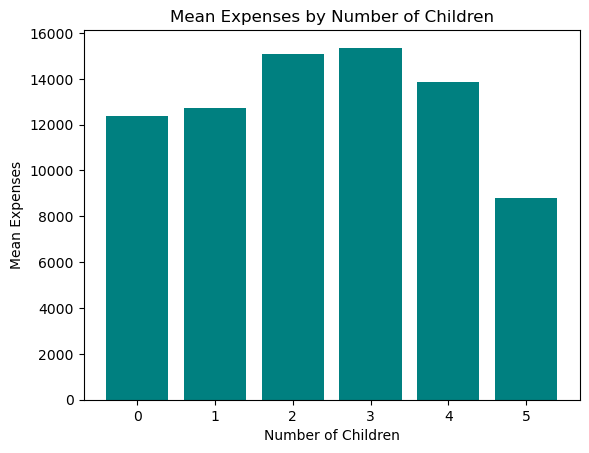

In [ ]:
# Define color
color = ['teal']

# Create a histogram
plt.bar(mean_expenses_per_child.index, mean_expenses_per_child.values, color=color)
plt.xlabel('Number of Children')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses by Number of Children')
plt.xticks(mean_expenses_per_child.index)
plt.show()

#### Checking the mean difference between having no children (0) or having children (1 to 5).
- Making it visual using a Histogram.

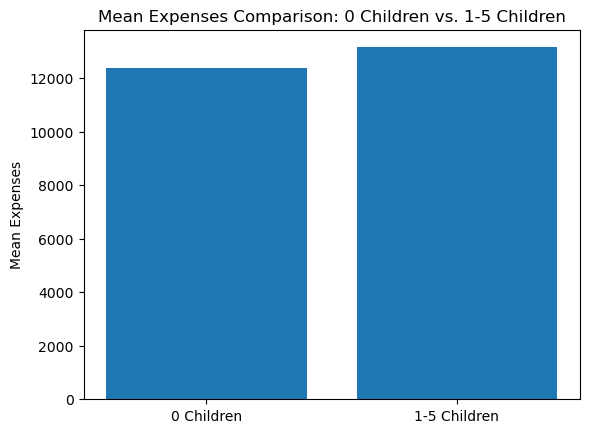

In [ ]:
# Create a new group for 1 to 5 children and calculate the mean expenses
mean_expenses_1_to_5_children = mean_expenses_per_child.loc[1:5].mean()

# Create a histogram comparing 0 children to the mean of 1 to 5 children
plt.bar(['0 Children', '1-5 Children'], [mean_expenses_per_child[0], mean_expenses_1_to_5_children])
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses Comparison: 0 Children vs. 1-5 Children')
plt.show()

#### Comparing medians to assess whether the typical value in one group differs from the typical value in the other groups. 
- This is particularly useful when dealing with skewed or non-normally distributed data.

In [ ]:
# Group the data by the 'children' column and calculate the median expenses for each group
median_expenses_per_child = df.groupby('children')['expenses'].median()

# Print the results
print(median_expenses_per_child)

children
0     9856.950
1     8483.870
2     9264.980
3    10600.550
4    11033.660
5     8589.565
Name: expenses, dtype: float64


#### Using a heatmap to explore how insurance expenses are distributed by number of children and region.
- Also to gain a better understanding of the relationships within the dataset.

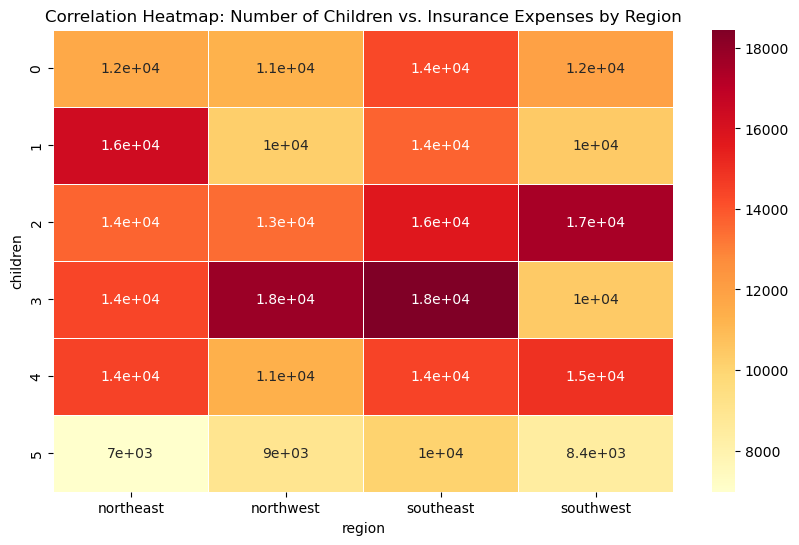

In [ ]:
# Create a pivot table to reshape the data for the heatmap
pivot_data = df.pivot_table(index='children', columns='region', values='expenses')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Correlation Heatmap: Number of Children vs. Insurance Expenses by Region')
plt.show()

## Sub-question 5: Is there a connection between the number of children and insurance expenses?
- H0: Having children does not affect the insurance expenses (=0).
- Ha: Having children does affect the insurance expenses (0>).

### Indepent Samples T-Test

In [ ]:
# Assumptions for Independent Samples T-Test

# 1. Independence Assumption:
# The observations in the 'no children' and 'children' groups are independent of each other.

# 2. Random Sample Assumption:
# The data is collected through a random sampling method to ensure that it represents the larger population from which it is drawn.

In [ ]:
# 3. Normality Assumption:
# Check the normality of data distribution for both 'no children' and 'children' groups.

# Create a group 'no_children' for 'children' == 0
no_children_group = df[df['children'] == 0]

# Create a group 'children' for 'children' > 0
children_group = df[df['children'] > 0]

In [ ]:
# Perform the Shapiro-Wilk test for normality on the 'expenses' column for both groups
statistic_no_children, p_value_no_children = stats.shapiro(no_children_group['expenses'])
statistic_children, p_value_children = stats.shapiro(children_group['expenses'])

# Print the results
print("Shapiro-Wilk Test for 'no_children' group:")
print("Statistic:", statistic_no_children, "p-value:", p_value_no_children)

print("Shapiro-Wilk Test for 'children' group:")
print("Statistic:", statistic_children, "p-value:", p_value_children)

Shapiro-Wilk Test for 'no_children' group:
Statistic: 0.8168937563896179 p-value: 4.92953164608208e-25
Shapiro-Wilk Test for 'children' group:
Statistic: 0.7925188541412354 p-value: 4.344345001994977e-30


- The p-values for both groups are greater than the chosen significance level of 0.05. 
- This means that there is insufficient evidence to conclude that the 'expenses' column is not normally distributed within each group.

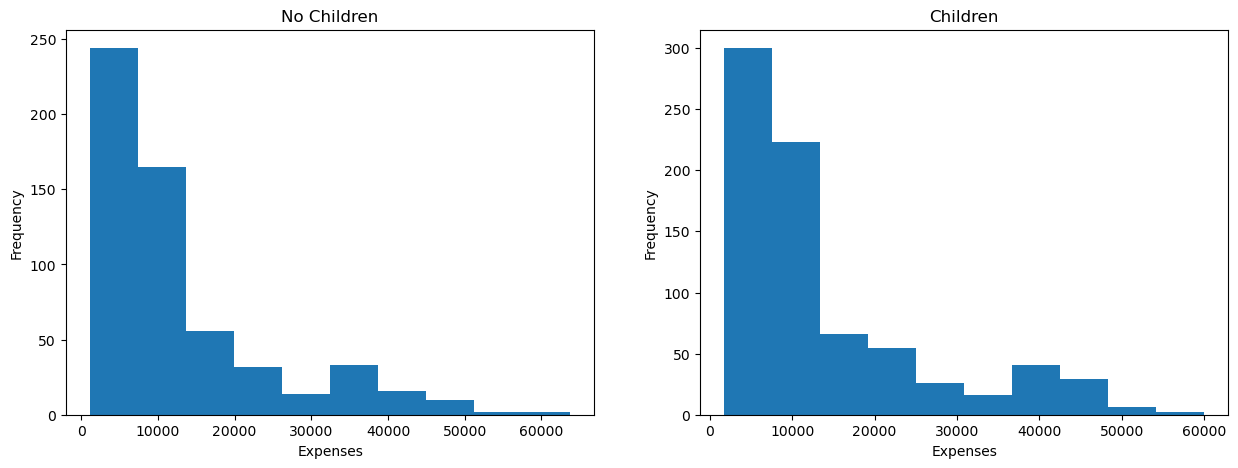

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot a histogram for the 'no_children' group on the first subplot
axs[0].hist(no_children_group['expenses'], bins=10)
axs[0].set_title('No Children')
axs[0].set_xlabel('Expenses')
axs[0].set_ylabel('Frequency')

# Plot a histogram for the 'children' group on the second subplot
axs[1].hist(children_group['expenses'], bins=10)
axs[1].set_title('Children')
axs[1].set_xlabel('Expenses')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.show()

- Trying to recognize a normal distribution in the groups using a histogram.

In [ ]:
# 4. Homogeneity of Variance : 
# The variances of the two groups being compared should be approximately equal.

# Extract the 'expenses' column from the DataFrame
no_children_expenses = no_children_group['expenses']
children_expenses = children_group['expenses']

# Perform Levene's test for homogeneity of variances
levene_statistic, levene_p = stats.levene(no_children_expenses, children_expenses)

print(f"Levene's test: Statistic={levene_statistic}, p-value={levene_p}")

Levene's test: Statistic=0.35167596125566974, p-value=0.5532663073122761


- Concluding from the results of the Levene's test, we can say that the data does not provide strong evidence to suggest that the 'expenses' column has different variances within each group.

In [ ]:
# Separate data into two groups: 0 children and 1 to 5 children
expenses_0_children = df[df['children'] == 0]['expenses']
expenses_1_to_5_children = df[(df['children'] >= 1) & (df['children'] <= 5)]['expenses']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(expenses_0_children, expenses_1_to_5_children)

# Print the results
print("Independent Samples t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("The difference in mean expenses is statistically significant.")
else:
    print("There is no statistically significant difference in mean expenses.")


Independent Samples t-test Results:
t-statistic: -2.3721
P-value: 0.0178
The difference in mean expenses is statistically significant.


- The t-statistic of -2.3721, which is a negative value suggests that, on average, having no children results in  lower insurance expenses compared to having children.
- The p-value of 0.0178 is less than the significance level of 0.05, suggesting that there's evidence to reject the null hypothesis. 
- In other words, it indicates that having children does have a statistically significant effect on insurance expenses. This statement supports Ha.

### Analysis of Variance (ANOVA)

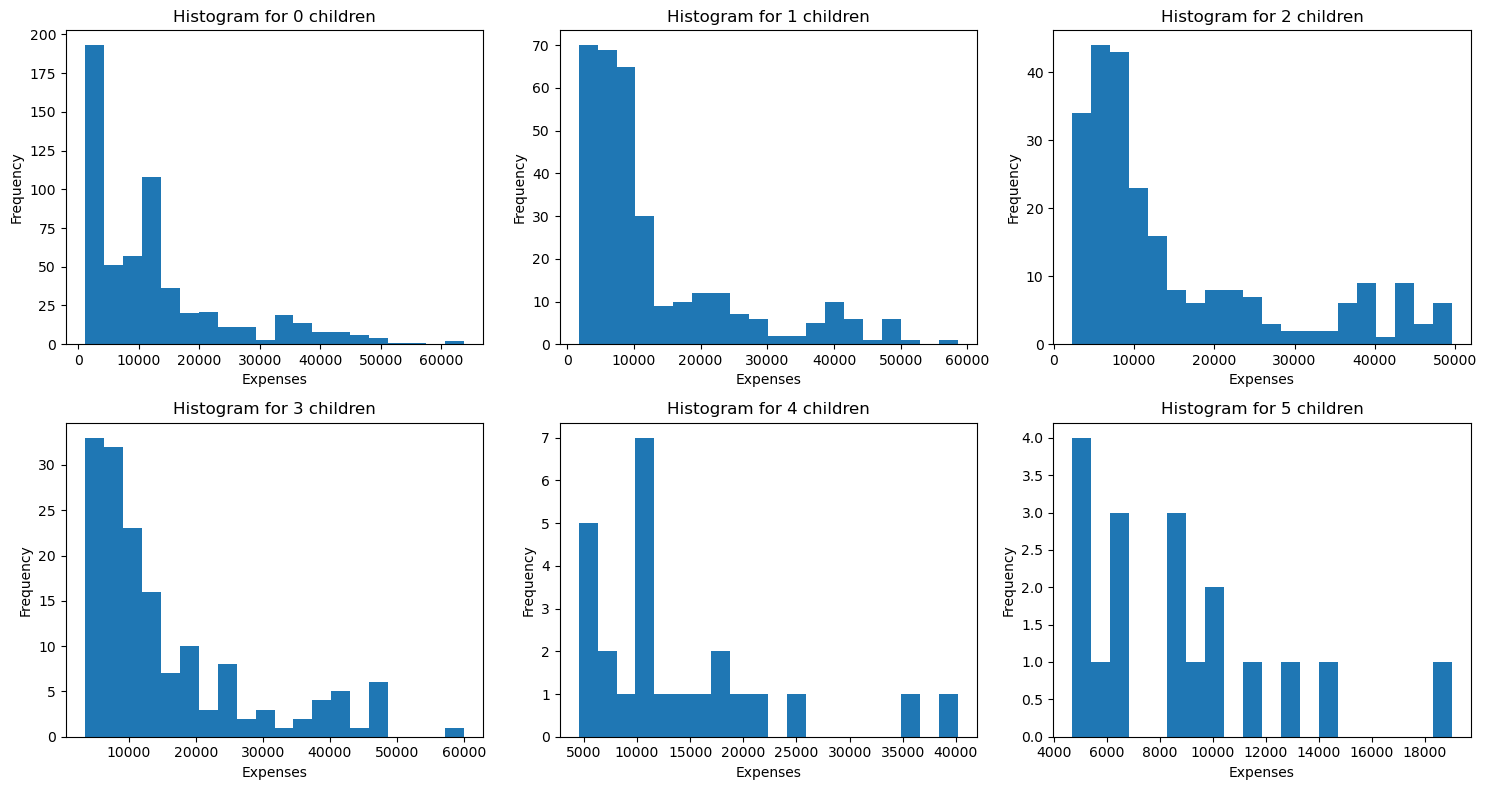

In [ ]:
# Anova assumptions: 
# Assumption 1: Independence
# The observations within and between groups are independent.

# Assumption 2: Normality
# Check that the data within each group follow a normal distribution by using a histogram.

# Create a separate histogram for each number of children (0 to 5)

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows and 3 columns for 6 histograms

# Create a separate histogram for each number of children (0 to 5) in subplots
for num_children, ax in zip(range(6), axes.flatten()):
    ax.hist(df[df['children'] == num_children]['expenses'], bins=20)
    ax.set_title(f'Histogram for {num_children} children')
    ax.set_xlabel('Expenses')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the histograms
plt.show()


In [ ]:
# Create a list of p-values for normality tests for each group
p_values = []

for i in range(6):
    group_data = df[df['children'] == i]['expenses']
    _, p_value = shapiro(group_data)
    p_values.append(p_value)

# Set the significance level
alpha = 0.05

# Check if all p-values are above the significance level
if all(p > alpha for p in p_values):
    print("All groups follow a normal distribution.")
else:
    print("At least one group does not follow a normal distribution.")

# Optionally, you can also print the p-values for each group
for i, p_value in enumerate(p_values):
    print(f"Group {i} p-value: {p_value:.4f}")

At least one group does not follow a normal distribution.
Group 0 p-value: 0.0000
Group 1 p-value: 0.0000
Group 2 p-value: 0.0000
Group 3 p-value: 0.0000
Group 4 p-value: 0.0007
Group 5 p-value: 0.0401


- From both the p-value and the histograms we can conclude that none of the groups follow a normal distribution. 
- The very low p-values indicate that there's strong evedicent againt the null hypothesis that the data is normally distributed.

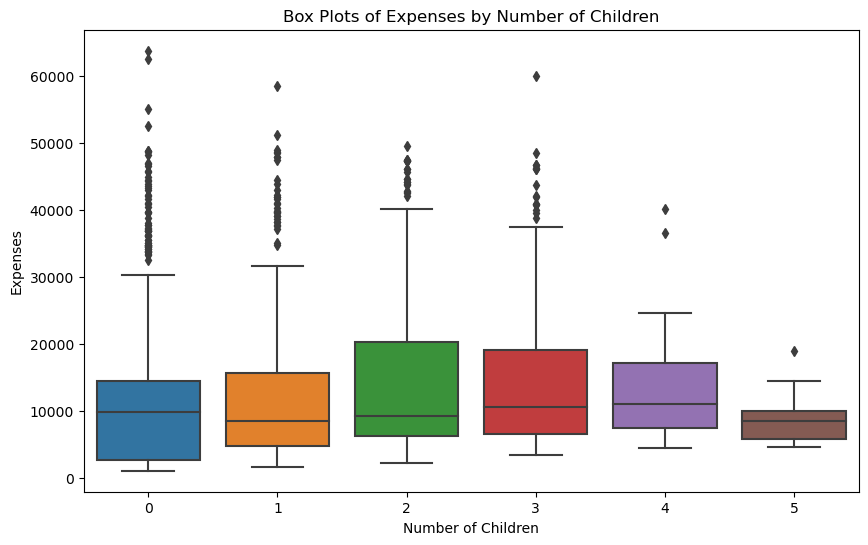

In [ ]:
# Assumption 3: Homogeneity of Variance
# Check if the variances within each group are roughly equal through visual inspection (box plots).

# Create box plots for each number of children
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.boxplot(x='children', y='expenses', data=df)

plt.title('Box Plots of Expenses by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Expenses')

plt.show()

- The visualization above through boxplots shows the variances between groups.

In [ ]:
# Assumption 4: Equal variance: hypothesis testing
# Levene test

from scipy.stats import levene

# Create an empty list to store Levene test results
levene_results = []

# Iterate through each number of children and perform the Levene test
for children_count in range(6):  # 0 to 5 children
    group = df[df['children'] == children_count]['expenses']
    levene_results.append(group)

# Perform the Levene test for all groups
statistic, p_value = levene(*levene_results)

# Display the Levene test results
print("Levene Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("At least one group has significantly different variance (reject null hypothesis)")
else:
    print("Variances are not significantly different among groups (fail to reject null hypothesis)")


Levene Statistic: 2.0832669968072866
P-value: 0.0649715232416075
Variances are not significantly different among groups (fail to reject null hypothesis)


- Looking at the Levene statistic and the p-value we can conclude that the variances are not significantly different among groups.
- This means we fail to reject null hypothesis.

In [ ]:
# Group the data by the 'children' column and collect expenses for each group
groups = [df[df['children'] == i]['expenses'] for i in range(6)]

# Perform ANOVA --> ANOVA not the right test, assumptions weren't met
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("Analysis of Variance (ANOVA) Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean expenses among the groups.")
else:
    print("There is no statistically significant difference in mean expenses among the groups.")

Analysis of Variance (ANOVA) Results:
F-statistic: 3.2969
P-value: 0.0058
There is a statistically significant difference in mean expenses among the groups.


- The values of both the F-statistic (3.2969) and the p-value (0.0058) indicate that there is a statistically significant difference in mean expenses among the groups.

### Bonferroni's T-Test
- One-way ANOVA tells us that the means of different groups are all equal or not equal, but the test gives no information about how they differ, in particular about which pairs are significantly different. 
- In reallife cases we are more inserted in knowing which pairs of groups are different.

- Bonferroni's test: Performs pair-wise t-tests for k null hypoethesis and gaurantees an overall Type I error rate of alpha by testing each null hypothesis at a significance level of alpha.

- The output from this method tells us whether to reject or not the pair-wise t-tests.

In [ ]:
# Now performing Post hoc method: Bonferroni's test

import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

# Create a MultiComparison object for the expenses data grouped by 'children'
mc = MultiComparison(df['expenses'], df['children'])

# Perform the Bonferroni post hoc test
result = mc.allpairtest(stats.ttest_ind, method='b')

# Display the Bonferroni post hoc test results
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     0      1 -0.4397 0.6602       1.0  False
     0      2 -2.8672 0.0042    0.0637  False
     0      3 -2.7454 0.0062    0.0929  False
     0      4 -0.6096 0.5424       1.0  False
     0      5  1.2603  0.208       1.0  False
     1      2 -2.2381 0.0256    0.3841  False
     1      3 -2.2505 0.0249    0.3731  False
     1      4 -0.4626 0.6439       1.0  False
     1      5  1.4098 0.1595       1.0  False
     2      3 -0.2166 0.8286       1.0  False
     2      4   0.462 0.6445       1.0  False
     2      5  2.0592 0.0405    0.6074  False
     3      4  0.5845 0.5596       1.0  False
     3      5  2.2429 0.0262    0.3926  False
     4      5  2.2111 0.0327      0.49  False
---------------------------------------------


- The table shows that all the p-values are greater than the alpha, so the null hypothesis is not yet rejected. Therefore, there is insufficient evidence to conclude that having children affects insurance expenses at the 0.05 level of significance.

#### As the ANOVA results are not reliable because they do not meet the assumptions, we performed the Bonferroni test. This shows that there is insufficient evidence in these data to conclude that there is a different effect on insurance costs between the groups. 

#### However, looking at the result of the T-test, we can conclude that there is a significant influence between having no children and having children on insurance expenses.

# Region Analysis

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [ ]:
os.chdir ("C:\\Users\\saharlamuhumedhussei")
os.getcwd

<function nt.getcwd()>

In [ ]:
insurance = pd.read_csv(r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv")


### Dataframe

In [ ]:
import pandas as pd

# Path to the csv file
file_path = r"C:\Users\saharlamuhumedhussei\OneDrive - HvA\Desktop\Python\Insurance.csv"

# Read the CSV file into a DataFrame
insurance = pd.read_csv(file_path)

# Display the data
print(insurance)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


### Mean expenses for region
- - to get a better understanding about the mean age in the dataset

In [ ]:
# 'region' and 'expenses' columns in the data set
regions = insurance['region'].unique()
mean_expenses_by_region = {}

for region in regions:
    mean_expenses = insurance[insurance['region'] == region]['expenses'].mean()
    mean_expenses_by_region[region] = mean_expenses

# Print the mean expenses for each region
for region, mean_expenses in mean_expenses_by_region.items():
    print(f"Mean Expenses for {region}: {mean_expenses:.2f}")


Mean Expenses for southwest: 12346.94
Mean Expenses for southeast: 14735.41
Mean Expenses for northwest: 12417.58
Mean Expenses for northeast: 13406.38


### Visualize the mean insurance expenses by region
- to get a better understanding about the mean age in the dataset

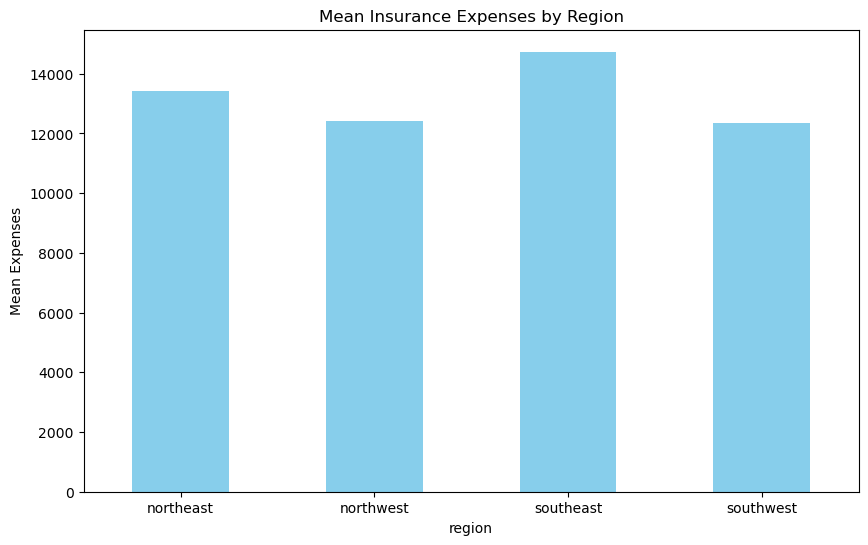

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The dataset has 'region' and 'expenses' columns
mean_expenses_by_region = insurance.groupby('region')['expenses'].mean()

plt.figure(figsize=(10, 6))
plt.title('Mean Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Mean Expenses')

# Create a bar chart for the mean expenses in each region
mean_expenses_by_region.plot(kind='bar', color='skyblue')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()


## SQ 6: Is there a connection between the regions in the United States and insurance expenses?

- H0: Living in a region in the United States does not have an affect on insurance expenses 
- Ha: Living in a region in the United States does have an affect on insurance expenses

### 1.0 Anova
Performing an Analysis of Variance (ANOVA) for region  assist to understand whether there are statistically significant differences in the mean insurance expenses among different regions.

In [ ]:
import pandas as pd
from scipy import stats

for region in regions:
    region_data.append(insurance[insurance['region'] == region]['expenses'])

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*region_data)

alpha = 0.05  # Set your significance level

# Print the results
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis (Ha): Living in a region in the United States does have an effect on insurance expenses.")
else:
    print("Fail to reject the null hypothesis (H0): Living in a region in the United States does not have an effect on insurance expenses.")


F-statistic: 2.55
p-value: 0.0130
Reject the null hypothesis (Ha): Living in a region in the United States does have an effect on insurance expenses.


- the analysis indicates that there is a significant difference in insurance expenses based on the region.

### 1.1 Assumptions for Anova

It is a must to test for assumptions for  ANOVA testing 

The assumptions for one-way ANOVA are:
1. *Sample independence*: each sample has been drawn independently of the other samples
2. *Normality*: each sample is taken from a normally distributed population 
3.  *Equal variance*: the variance of data within the different groups should be the same

#### 1.2. Testing for normality
- *Compute the residuals*: the residuals are computes by simply subtracting from the measurements of each segment the mean value for that segment and dividing by the standard deviation of each segment.

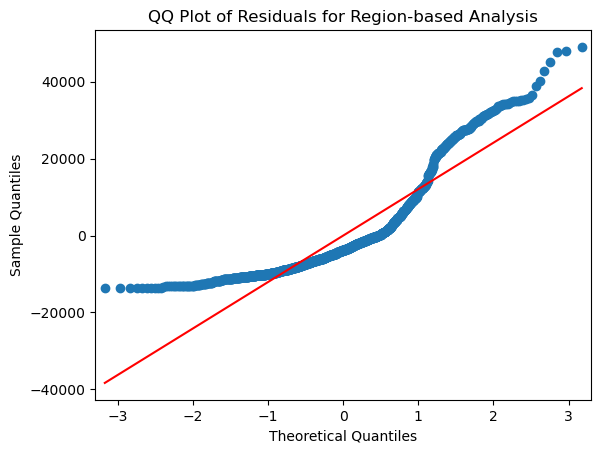

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Calculate residuals
all_residuals = np.concatenate([data - data.mean() for data in region_data])

# Create a QQ plot
sm.qqplot(all_residuals, line='s')

# Add labels and title
plt.title('QQ Plot of Residuals for Region-based Analysis')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()



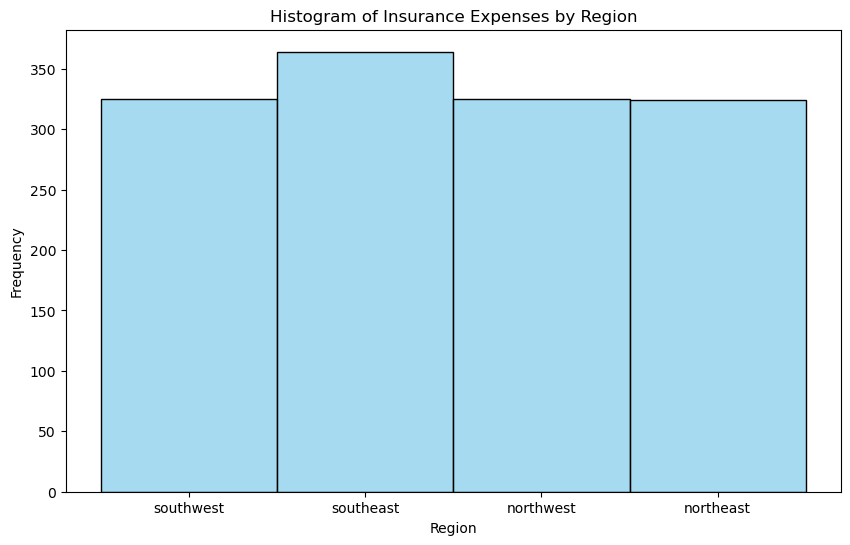

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  

# insurance in the DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance, x='region', color='skyblue', bins='auto', multiple="stack")

# Add labels and title
plt.title('Histogram of Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')

# Show the plot
plt.show()


- based on the QQ and Histogram it means that the data is not normally distrubted and that means that we have to use the levene's test for variance

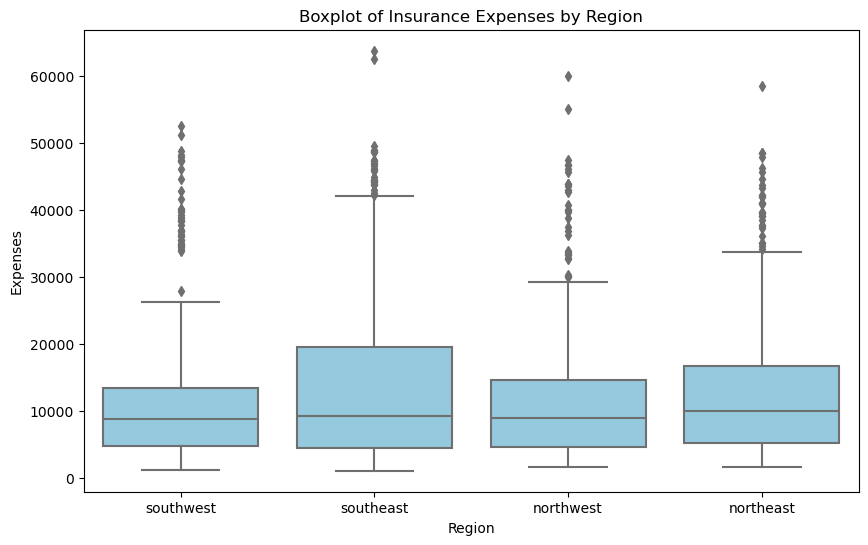

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for styling

# insurance is in the DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=insurance, color='skyblue')

# Add labels and title
plt.title('Boxplot of Insurance Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Expenses')

# Show the plot
plt.show()


- The boxplot helps to visually analyzing the data first for testing equal variance

### 1.3 Testing for Equal Variance
- Levene Test
- The reason for checking is whether the variances of different groups are significantly different and it does this by comparing the variances between groups with the variances within the age groups.

In [ ]:
from scipy.stats import levene

#insurance is in the DataFrame
regions = insurance['region'].unique()
region_data = [insurance[insurance['region'] == region]['expenses'] for region in regions]

# Perform Levene's test
statistic, p_value = levene(*region_data)

alpha = 0.05  # Set your significance level

# Print the results
print(f'Levene\'s Test - p-value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis: Variances are not equal across regions.")
else:
    print("Fail to reject the null hypothesis: Variances are equal across regions.")


Levene's Test - p-value: 0.0009
Reject the null hypothesis: Variances are not equal across regions.


- This indicates that the variability in insurance expenses is significantly different between at least two regions.

### Conclusion
The combination of Levene's test and the ANOVA test indicates that not only are the variances different across regions, but there are also significant differences in the mean insurance expenses among the regions. Thus, the region in which an individual lives appears to be associated with variations in insurance expenses.


# Multiple Linear Regression - Made together

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import pymer4
from pymer4.models import Lmer
from pymer4.models import Lm
from pymer4.utils import get_resource_path
import os
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load your dataset
df = pd.read_csv(os.path.join(get_resource_path(), r'C:\Users\alvarocairo\Insurance.csv'))
# Display the data
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


In [ ]:
# Check what is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
rp.codebook(df) # get a better understanding of the data

Variable: age    Data Type: int64 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 47 

 Range: [18, 64] 
 Mean: 39.21 
 Standard Deviation: 14.05 
 Mode: 18 
 10th Percentile: 19.0 
 25th Percentile: 27.0 
 50th Percentile: 39.0 
 75th Percentile: 51.0 
 90th Percentile: 59.0 





Variable: sex    Data Type: object 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
female        662
  male        676




Variable: bmi    Data Type: float64 

 Number of Obs.: 1338 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 275 

 Range: [16.0, 53.1] 
 Mean: 30.67 
 Standard Deviation: 6.1 
 Mode: 27.6 
 10th Percentile: 23.0 
 25th Percentile: 26.3 
 50th Percentile: 30.4 
 75th Percentile: 34.7 
 90th Percentile: 38.629999999999995 





Variable: children    Data Type: int64 

 Number of Obs.: 1338 
 Number of mi

In [ ]:
IV1 = df[['age', 'bmi']]  # Independent Variables 1: age and bmi
IV3 = df[['sex', 'children', 'smoker', 'region']]  # Independent Variables 2: sex, children, smoker, region
DV = df['expenses'] # Dependent Variable: expenses

In [ ]:
# Replace values in the 'children' column
df['children'] = df['children'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

In [ ]:
bmi = {
    '0-18.5': (0,18.5), #underweight range
    '18.51-25': (18.51,25), #normal weight range
    '25.01-29.99': (25.01,29.99), #overweight range 
    '30.0 - 34.99': (30,34.99), #obesity range
    '35.0 and above':(35, float('inf')) #severe obesity range
}

### Transforming categorical values to numerical values
- male is 0
- female is 1

In [ ]:
# Map 'male' to 0 and 'female' to 1
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# Display the resulting DataFrame
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,1,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,1,0,northwest,10600.55
1334,18,1,31.9,0,0,northeast,2205.98
1335,18,1,36.9,0,0,southeast,1629.83
1336,21,1,25.8,0,0,southwest,2007.95


### Region as the grouping variable

In [ ]:
# Define your multilevel linear regression model with 'region' as the grouping variable
model = Lmer('expenses ~ age + sex + children + smoker + bmi +(age+sex+children+smoker+bmi|region)', data=df)

# Fit the model
results = model.fit()

# Get and print the model summary
print(results)

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: expenses~age+sex+children+smoker+bmi+(age+sex+children+smoker+bmi|region)

Family: gaussian	 Inference: parametric

Number of observations: 1338	 Groups: {'region': 4.0}

Log-likelihood: -13501.793 	 AIC: 27059.587

Random effects:

                 Name           Var       Std
region    (Intercept)  2.143000e+00     1.464
region            age  5.105700e+01     7.145
region            sex  1.782133e+04   133.497
region       children  2.258548e+05   475.242
region         smoker  1.168627e+07  3418.519
region            bmi  1.459316e+03    38.201
Residual               3.572998e+07  5977.456

                IV1       IV2   Corr
region  (Intercept)       age  1.000
region  (Intercept)       sex  0.508
region  (Intercept)  children -0.262
region  (Intercept)    smoker -0.005
region  (Intercept)       bmi -0.240
region          age       sex  0.508
region          age  children -0.262


- This indicates  that there is variability in both intercepts and slopes across different regions and variables such as 'smoker' and 'bmi' have a significant impact on mean expenses. Furthermore, the correlations between random effects provide insights into how different factors may be related within regions.


In [ ]:
model.fixef

,(Intercept),age,sex,children,smoker,bmi
northeast,-12730.499886,252.677745,91.191003,1460.301270,20884.671228,374.132150
northwest,-12729.866110,255.771551,137.830020,1290.611929,21915.440240,359.174487
southeast,-12729.491902,257.598263,201.553907,709.019073,26496.988954,309.417810
southwest,-12729.162803,259.204776,231.266308,731.673618,25321.828512,320.400427


this values indicates that age, gender, number of children, smoking status, and BMI are associated with variations in expenses across different regions.
- The positive coefficients for age suggest that, on average, expenses increase with age in each region
- For gender it indicates higher expenses for the specified gender (female).
- The positive coefficients for children suggest that, on average, expenses increase with the number of children in each region.
- The positive coefficients for smoker suggest that, on average, expenses are higher for smokers in each region
- The positive coefficients for BMI suggest that, on average, expenses increase with BMI in each region.

In [ ]:
model.ranef

,X.Intercept.,age,sex,children,smoker,bmi
northeast,-0.744711,-3.635338,-74.269307,412.399798,-2770.061005,33.350932
northwest,-0.110935,-0.541533,-27.630289,242.710457,-1739.291994,18.393269
southeast,0.263273,1.285179,36.093597,-338.882400,2842.256721,-31.363409
southwest,0.592372,2.891692,65.805999,-316.227855,1667.096279,-20.380791


These values represent the estimated random effects for the slopes associated with each predictor (age, sex, children, smoker, bmi) within each region and they quantify how much the effect of each predictor varies across different regions. Furthermore, Positive or negative values indicate the direction of the deviation from the overall slope.
The random effects indicates  that there is variability across regions in both the intercept and the effects of the slopes. The negative intercept random effects imply that, on average, expenses tend to be lower within each region compared to the overall intercept. Lastly, the variability in slopes (age, sex, children, smoker, bmi) indicates that the impact of these predictors on expenses varies across regions.

In [ ]:
print(model.coefs)

                 Estimate        2.5_ci       97.5_ci           SE  \
(Intercept) -12729.755175 -14610.978754 -10848.531597   959.825585   
age            256.313084    232.223076    280.403091    12.291046   
sex            165.460310   -491.588549    822.509168   335.235169   
children      1047.901472    249.251974   1846.550971   407.481721   
smoker       23654.732234  20210.143322  27099.321145  1757.475616   
bmi            340.781218    275.410514    406.151923    33.353013   

                      DF     T-stat         P-val  Sig  
(Intercept)  1031.428480 -13.262571  3.499023e-37  ***  
age             6.235446  20.853643  5.281008e-07  ***  
sex            31.766310   0.493565  6.250088e-01       
children        5.383384   2.571653  4.661662e-02    *  
smoker          3.291460  13.459494  5.440114e-04  ***  
bmi            13.684992  10.217404  8.809577e-08  ***  


The intercept is significantly different from zero (p-value < 0.001). Age, children, smoker, and BMI all seem to have significant effects on the dependent variable, as their p-values are below the 0.05 threshold. Furthermore, sex does not appear to have a significant effect since its p-value is higher than 0.05.



In [ ]:
# Define the formula for your multilevel model
formula = "expenses ~ age + sex + children + smoker + C(region) + age:region + sex:region + children:region + smoker:region"

# Fit the multilevel model
model = sm.MixedLM.from_formula(formula, data=df, groups=df["region"]).fit()

# Print the model summary
print(model.summary())


                       Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         expenses     
No. Observations:          1338            Method:                     REML         
No. Groups:                4               Scale:                      39899745.9409
Min. group size:           324             Log-Likelihood:             -13463.2984  
Max. group size:           364             Converged:                  Yes          
Mean group size:           334.5                                                    
------------------------------------------------------------------------------------
                                Coef.     Std.Err.   z    P>|z|   [0.025     0.975] 
------------------------------------------------------------------------------------
Intercept                       -2115.154 6422.996 -0.329 0.742 -14703.995 10473.688
C(region)[T.northwest]           -663.554 9085.316 -0.073 0.942 -18470.446 17143.337
C(re

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


The intercept is not statistically significant, suggesting that when other variables are held constant, the average expenses are not significantly different from zero. Age, children and smokers have a significant impact on expenses. However, the effects of sex and some regional interactions are not statistically significant.
The estimated variance in expenses across different regions (Group Variable) is considerable, indicating substantial variability that is specific to each region.


## Conclusion
### Insurers can leverage the identified factors: age, number of children, and smoking status as key metrics to refine policies and pricing structures. This targeted approach enhances accuracy in premium calculations, allowing companies to offer more competitive and customized plans, ultimately improving customer satisfaction and optimizing business performance.